**Import libraries**

In [ ]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U tensorboard-plugin-profile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from imutils import paths
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from PIL import Image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import glob

In [ ]:
device_name = tf.test.gpu_device_name()
if not device_name:
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


**Mounting drive**

In [ ]:
from google.colab import drive
df = drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!mkdir /content/APOD_Train
!mkdir /content/APOD_Valid

In [ ]:
!unzip /content/drive/MyDrive/APOD_Train.zip -d /content/APOD_Train
!unzip /content/drive/MyDrive/APOD_Valid.zip -d /content/APOD_Valid

Streaming output truncated to the last 5000 lines.
  inflating: /content/APOD_Train/__MACOSX/APOD_Train/Fake/._01193.png  
  inflating: /content/APOD_Train/APOD_Train/Fake/1636371984_00300.png  
  inflating: /content/APOD_Train/__MACOSX/APOD_Train/Fake/._1636371984_00300.png  
  inflating: /content/APOD_Train/APOD_Train/Fake/01178.png  
  inflating: /content/APOD_Train/__MACOSX/APOD_Train/Fake/._01178.png  
  inflating: /content/APOD_Train/APOD_Train/Fake/00500.png  
  inflating: /content/APOD_Train/__MACOSX/APOD_Train/Fake/._00500.png  
  inflating: /content/APOD_Train/APOD_Train/Fake/1636371984_01787.png  
  inflating: /content/APOD_Train/__MACOSX/APOD_Train/Fake/._1636371984_01787.png  
  inflating: /content/APOD_Train/APOD_Train/Fake/1636371984_00499.png  
  inflating: /content/APOD_Train/__MACOSX/APOD_Train/Fake/._1636371984_00499.png  
  inflating: /content/APOD_Train/APOD_Train/Fake/00514.png  
  inflating: /content/APOD_Train/__MACOSX/APOD_Train/Fake/._00514.png  
  inflating: 

**Working with Data**

In [ ]:
Fake_train = []
for name in glob.glob ('/content/APOD_Train/APOD_Train/Fake/*'):
  Fake_train.append(name)

In [ ]:
Real_train = []
for name in glob.glob ('/content/APOD_Train/APOD_Train/Real/*'):
  Real_train.append(name)

In [ ]:
Fake_valid=[]
for name in glob.glob ('/content/APOD_Valid/APOD_Valid/Fake/*'):
  Fake_valid.append(name)

In [ ]:
Real_valid=[]
for name in glob.glob ('/content/APOD_Valid/APOD_Valid/Real/*'):
  Real_valid.append(name)

**combining dataset**

In [ ]:
files_train = Fake_train + Real_train
#files_train

files_valid = Fake_valid + Real_valid
#files_valid

In [ ]:
filename_train = [str(f.split("/")[5]) for f in files_train]
#filename_train

filename_valid = [str(f.split("/")[5]) for f in files_valid]
#filename_valid

In [ ]:
label_train =[str(f.split("/")[4]) for f in files_train]
#label_train

label_valid =[str(f.split("/")[4]) for f in files_valid]
#label_valid

In [ ]:
folder_train = ["/"+str(f.split("/")[1])+"/"+str(f.split("/")[2])+"/"+str(f.split("/")[3])+"/"+str(f.split("/")[4]) for f in files_train]
#folder_train

folder_valid = ["/"+str(f.split("/")[1])+"/"+str(f.split("/")[2])+"/"+str(f.split("/")[3])+"/"+str(f.split("/")[4]) for f in files_valid]
#folder_valid

**Creating dataframe**

In [ ]:
import pandas as pd
df_train = pd.DataFrame()
df_valid = pd.DataFrame()

In [ ]:
df_train["Folder"] = folder_train
df_train["File"] = filename_train
df_train["Label"] = label_train

df_valid["Folder"] = folder_valid
df_valid["File"] = filename_valid
df_valid["Label"] = label_valid

**Displaying dataset**

In [ ]:
df_train.head()

,Folder,File,Label
0,/content/APOD_Train/APOD_Train/Fake,1636371984_01682.png,Fake
1,/content/APOD_Train/APOD_Train/Fake,01304.png,Fake
2,/content/APOD_Train/APOD_Train/Fake,1636371984_00328.png,Fake
3,/content/APOD_Train/APOD_Train/Fake,1636371984_01261.png,Fake
4,/content/APOD_Train/APOD_Train/Fake,1636371984_02416.png,Fake


In [ ]:
df_valid.head()

,Folder,File,Label
0,/content/APOD_Valid/APOD_Valid/Fake,1636371984_04310.png,Fake
1,/content/APOD_Valid/APOD_Valid/Fake,00027.png,Fake
2,/content/APOD_Valid/APOD_Valid/Fake,1636371984_03158.png,Fake
3,/content/APOD_Valid/APOD_Valid/Fake,1636371984_04760.png,Fake
4,/content/APOD_Valid/APOD_Valid/Fake,1636371984_04163.png,Fake


**Train and test splitting Data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df_train, stratify = df_train["Label"], test_size= 0.2)
train1 = train.reset_index()
test1 = test.reset_index()
train2 = train1.drop(['index'] , axis=1)
test2 = test1.drop(['index'] , axis=1)

In [ ]:
IMG_SIZE= 200

In [ ]:
df1 = train2

**Train data**

In [ ]:
x_train = []
y_train = []
for t in range(len(df1)):
    folder = df1["Folder"][t]
    file1 = df1["File"][t]
    image = cv2.imread(os.path.join(folder, file1),cv2.IMREAD_GRAYSCALE)  
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image/255.0
    image = image.reshape(-1,IMG_SIZE,IMG_SIZE,1)
    image = image.reshape(image.shape[1], image.shape[2])
    x_train.append(image)
    y_train.append(df1["Label"][t])

In [ ]:
x_train = np.array(x_train)
print("x_train done")
y_train = np.array(pd.get_dummies(y_train), dtype= np.uint8)

x_train done


In [ ]:
x_train = x_train.reshape(-1,IMG_SIZE,IMG_SIZE, 1)

**Test data** 

In [ ]:
df2=test2

In [ ]:
x_test = []
y_test = []
for t in range(len(df2)):
    folder = df2["Folder"][t]
    file1= df2["File"][t]
    image = cv2.imread(os.path.join(folder, file1),cv2.IMREAD_GRAYSCALE) 
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image/255.0
    image = image.reshape(1,IMG_SIZE,IMG_SIZE,1) 
    image = image.reshape(image.shape[1], image.shape[2])
    x_test.append(image)
    y_test.append(df2["Label"][t])

In [ ]:
x_test = np.array(x_test)
print("x_test done")
y_test = np.array(pd.get_dummies(y_test), dtype= np.uint8)

x_test done


In [ ]:
x_test = x_test.reshape(-1,IMG_SIZE,IMG_SIZE, 1)

**Valid Data**

In [ ]:
x_valid = []
y_valid = []
for t in range(len(df2)):
    folder = df_valid["Folder"][t]
    file1= df_valid["File"][t]
    image = cv2.imread(os.path.join(folder, file1),cv2.IMREAD_GRAYSCALE) 
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image/255.0
    image = image.reshape(1,IMG_SIZE,IMG_SIZE,1) 
    image = image.reshape(image.shape[1], image.shape[2])
    x_valid.append(image)
    y_valid.append(df_valid["Label"][t])

In [ ]:
x_valid = np.array(x_valid)
print("x_valid done")
y_valid = np.array(pd.get_dummies(y_valid), dtype= np.uint8)

x_valid done


In [ ]:
x_valid = x_valid.reshape(-1,IMG_SIZE,IMG_SIZE, 1)

**Creating CNN model**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from keras.layers import Dropout, Conv2D, Dense, BatchNormalization, MaxPooling2D, Flatten,Activation, Dense

**Creating layer**

In [ ]:
model = Sequential()
model.add(Conv2D(64, 3, 3, padding = 'same', input_shape=(x_train.shape[1:])))
model.add(Activation('relu'))
BatchNormalization(axis=1)
model.add(Conv2D(64,3,3 , padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

**Combining model**

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ["accuracy"])

**Summary model**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 67, 67, 64)        640       
                                                                 
 activation (Activation)     (None, 67, 67, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 23, 23, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                        

In [ ]:
from datetime import datetime
# Create a TensorBoard callback
logs = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")

# You'll need to edit the profile_batch here so that it profiles 10 batches
# in the second epoch of your training
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '250,260')


In [ ]:
%load_ext tensorboard
!rm -rf ./logs/

**Accuracy evaluation**

In [ ]:
hist = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), 
                 epochs = 25, callbacks=[tboard_callback])

Epoch 1/25
175/175 [==============================] - 11s 20ms/step - loss: 0.4585 - accuracy: 0.7625 - val_loss: 0.6765 - val_accuracy: 0.6214
Epoch 2/25
175/175 [==============================] - 3s 18ms/step - loss: 0.3843 - accuracy: 0.8132 - val_loss: 0.4721 - val_accuracy: 0.8021
Epoch 3/25
175/175 [==============================] - 3s 15ms/step - loss: 0.3688 - accuracy: 0.8318 - val_loss: 0.6512 - val_accuracy: 0.6586
Epoch 4/25
175/175 [==============================] - 3s 15ms/step - loss: 0.3465 - accuracy: 0.8377 - val_loss: 0.4737 - val_accuracy: 0.7943
Epoch 5/25
175/175 [==============================] - 3s 15ms/step - loss: 0.3129 - accuracy: 0.8559 - val_loss: 0.5153 - val_accuracy: 0.7664
Epoch 6/25
175/175 [==============================] - 3s 14ms/step - loss: 0.2939 - accuracy: 0.8657 - val_loss: 0.4794 - val_accuracy: 0.8057
Epoch 7/25
175/175 [==============================] - 3s 15ms/step - loss: 0.2635 - accuracy: 0.8825 - val_loss: 0.5910 - val_accuracy: 0.773

In [ ]:
%tensorboard --logdir logs

In [ ]:
_, test_accuracy = model.evaluate(x_test, y_test)
print('Test accuracy of the Model: ', test_accuracy)

44/44 [==============================] - 0s 8ms/step - loss: 1.0040 - accuracy: 0.8300
Test accuracy of the Model:  0.8299999833106995


**Creating accuracy graph**

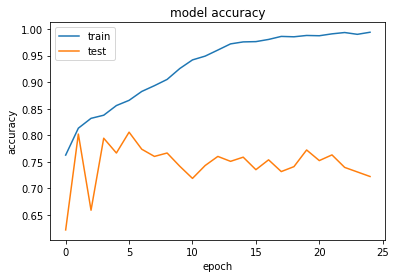

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Creating loss graph**

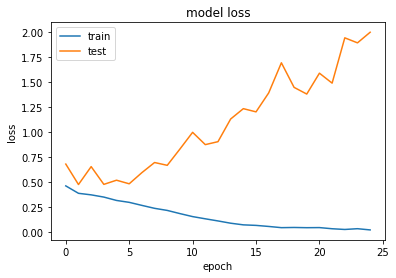

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Real images**

**Fake images**